# Yoonhyuck WOO / Purdue University_Computer and Information Technology
# **Lab 3: Convolutional Neural Network**
# Professor: Jin Wei-Kocsis, Ph.D

The lab report will be due by **November 10th, 2023**.

**Requirement: Please submit the ipynb file of your lab via the link in Brightspace.**

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

In [4]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


##**Problem 1**
In this problem, we will focus on completing an hand-written digit recognition task for MNIST dataset. In this problem, you are asked to design a convolutional neural network (CNN) with three convolutional layers and three max-pooling layers.

Requirments:
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training errors, and (3) the obtained testing errors.

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

print(X_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


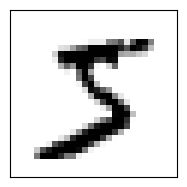

In [ ]:
plt.figure(figsize=(10,10))
for i in range(1):
    plt.subplot(4, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    # plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
# Buidling CNN
model = models.Sequential()

# Extracting features
model.add(layers.Conv2D(25, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(50, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(100, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

# Categorize
model.add(layers.Flatten())
model.add(layers.Dense(130, activation='relu'))

# output
model.add(layers.Dense(10, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 25)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        11300     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 50)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 100)         45100     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 100)         0

In [ ]:
epochs = 13

In [ ]:
# from_logits = False if you set the activation function as softmax in the last dense layer

batch_size = 100

with tf.device(device_name):
  adam = optimizers.Adam(learning_rate=0.0001)


  model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # softamx: from_logits=True / other activation => False
            metrics=['accuracy'])

  history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size,
                  validation_data=(X_test, y_test))

Epoch 1/13


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


600/600 [==============================] - 13s 5ms/step - loss: 0.4297 - accuracy: 0.9262 - val_loss: 0.0628 - val_accuracy: 0.9793
Epoch 2/13
600/600 [==============================] - 3s 5ms/step - loss: 0.0540 - accuracy: 0.9836 - val_loss: 0.0457 - val_accuracy: 0.9842
Epoch 3/13
600/600 [==============================] - 3s 6ms/step - loss: 0.0387 - accuracy: 0.9877 - val_loss: 0.0402 - val_accuracy: 0.9870
Epoch 4/13
600/600 [==============================] - 3s 5ms/step - loss: 0.0294 - accuracy: 0.9902 - val_loss: 0.0467 - val_accuracy: 0.9858
Epoch 5/13
600/600 [==============================] - 3s 5ms/step - loss: 0.0274 - accuracy: 0.9912 - val_loss: 0.0348 - val_accuracy: 0.9891
Epoch 6/13
600/600 [==============================] - 3s 5ms/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 0.0385 - val_accuracy: 0.9870
Epoch 7/13
600/600 [==============================] - 3s 6ms/step - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0442 - val_accuracy: 0.9880
Epoch 8/13
600/6

# P1. Testing error & Training error

313/313 - 1s - loss: 0.0465 - accuracy: 0.9909 - 906ms/epoch - 3ms/step
Train_error 0.0142533 	 Train Accuracy: 0.9953
Test Error: 0.0464515 	 Test Accuracy: 0.9909


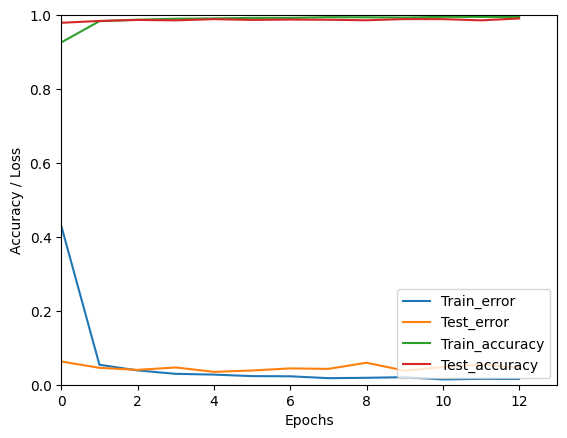

In [ ]:
plt.plot(history.history['loss'], label='Train_error')
plt.plot(history.history['val_loss'], label = 'Test_error')
plt.plot(history.history['accuracy'], label = 'Train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'Test_accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.xlim([0, epochs])
plt.ylim([0, 1])
plt.legend(loc='lower right')

results = model.evaluate(X_test,  y_test, verbose=2)

Train_error = history.history['loss']
Train_error = min(Train_error)

Train_Accuracy = history.history['accuracy']
Train_Accuracy = max(Train_Accuracy)

print('Train_error', round(Train_error, 7), '\t', 'Train Accuracy:',  round(Train_Accuracy, 7))
print('Test Error:', round(results[0], 7), '\t', 'Test Accuracy:',  round(results[1], 7))

##**Problem 2**
In this problem, we will focus on completing an image identification task for Fashion MNIST dataset. In this problem, you are asked to design a fully-connected neural network (FCNN) and a CNN, respectively, for this task. You will have the full freedom to design the structures of your FCNN and CNN.

Requirments:
*   You need to include the following four components in your lab report: (1) the codes for FCNN and CNN, (2) the obtained training errors by using FCNN and CNN, respectively, (3) the obtained testing errors by using FCNN and CNN, and (4) your observation by comparing the performances of FCNN-based and CNN-based solutions in this task.

In [ ]:
# Hint: Download MNIST fashion dataset
(X2_train, y2_train), (X2_test, y2_test) = datasets.fashion_mnist.load_data() # colorful dataset => consider using Conv3D

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
print(X2_train.shape)

(60000, 28, 28)


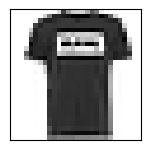

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(10, 10, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(X2_train[1], cmap=plt.cm.binary)
plt.show()

In [ ]:
FCNN_X2_train = X2_train.reshape(60000, 784)
FCNN_X2_train = FCNN_X2_train.astype('float32') / 255

FCNN_X2_test = X2_test.reshape(10000, 784)
FCNN_X2_test = FCNN_X2_test.astype('float32') / 255

print(X2_train.shape)
print(FCNN_X2_train.shape)

print(X2_test.shape)
print(FCNN_X2_test.shape)

(60000, 28, 28)
(60000, 784)
(10000, 28, 28)
(10000, 784)


# 2.1 FCNN

In [ ]:
# Design a fully-connected neural network with one input layer with two nodes, one hidden layer with two nodes, and one output layer with one node (totally three layers)
model2_fcnn = models.Sequential()
model2_fcnn.add(layers.Normalization(input_shape = [784,], axis = None))
model2_fcnn.add(layers.Dense(150, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model2_fcnn.add(layers.Dense(100, activation = 'relu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model2_fcnn.add(layers.Dense(50, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)))

model2_fcnn.add(layers.Dense(10, activation = 'softmax', activity_regularizer=tf.keras.regularizers.L2(0.01)))

model2_fcnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_8 (Normaliza  (None, 784)               3         
 tion)                                                           
                                                                 
 dense_34 (Dense)            (None, 150)               117750    
                                                                 
 dense_35 (Dense)            (None, 100)               15100     
                                                                 
 dense_36 (Dense)            (None, 50)                5050      
                                                                 
 dense_37 (Dense)            (None, 10)                510       
                                                                 
Total params: 138413 (540.68 KB)
Trainable params: 138410 (540.66 KB)
Non-trainable params: 3 (16.00 Byte)
_____________

In [ ]:
with tf.device(device_name):
  batch_size = 100


  tf.config.get_visible_devices()
  adam = optimizers.Adam(learning_rate=0.001)
  model2_fcnn.compile(optimizer = adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  history2_fcnn = model2_fcnn.fit(FCNN_X2_train, y2_train, epochs = 130, batch_size = batch_size,
                    validation_data=(FCNN_X2_test, y2_test))

Epoch 1/130
600/600 [==============================] - 5s 6ms/step - loss: 0.8023 - accuracy: 0.8143 - val_loss: 0.5829 - val_accuracy: 0.8486
Epoch 2/130
600/600 [==============================] - 3s 4ms/step - loss: 0.5155 - accuracy: 0.8636 - val_loss: 0.5269 - val_accuracy: 0.8502
Epoch 3/130
600/600 [==============================] - 3s 5ms/step - loss: 0.4560 - accuracy: 0.8731 - val_loss: 0.5077 - val_accuracy: 0.8539
Epoch 4/130
600/600 [==============================] - 2s 4ms/step - loss: 0.4253 - accuracy: 0.8787 - val_loss: 0.4573 - val_accuracy: 0.8684
Epoch 5/130
600/600 [==============================] - 3s 6ms/step - loss: 0.4043 - accuracy: 0.8824 - val_loss: 0.4629 - val_accuracy: 0.8567
Epoch 6/130
600/600 [==============================] - 3s 4ms/step - loss: 0.3921 - accuracy: 0.8858 - val_loss: 0.4383 - val_accuracy: 0.8696
Epoch 7/130
600/600 [==============================] - 2s 4ms/step - loss: 0.3789 - accuracy: 0.8872 - val_loss: 0.4563 - val_accuracy: 0.8579

# 2.2.1 FCNN Test & Train Error

> Indented block



313/313 - 1s - loss: 0.5007 - accuracy: 0.8679 - 1s/epoch - 4ms/step
Train_error 0.2503307 	 Train Accuracy: 0.9311333
Test Error: 0.5007455 	 Test Accuracy: 0.8679


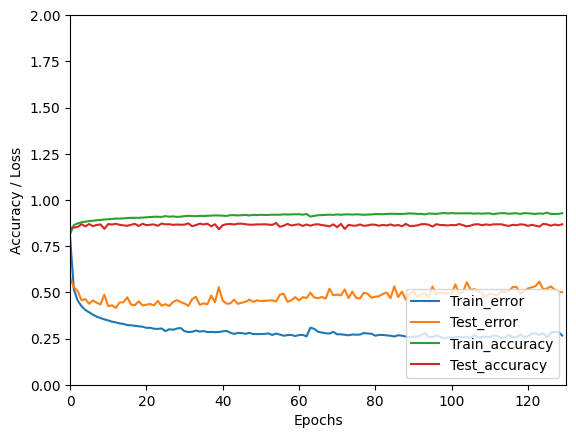

In [ ]:
# Evaluate the fully connected neural network Model
plt.plot(history2_fcnn.history['loss'], label='Train_error')
plt.plot(history2_fcnn.history['val_loss'], label = 'Test_error')
plt.plot(history2_fcnn.history['accuracy'], label = 'Train_accuracy')
plt.plot(history2_fcnn.history['val_accuracy'], label = 'Test_accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.xlim([0, len(history2_fcnn.history['loss'])])
plt.ylim([0, 2])
plt.legend(loc='lower right')

results2_fcnn = model2_fcnn.evaluate(FCNN_X2_test, y2_test, verbose=2)

Train_error = history2_fcnn.history['loss']
Train_error = min(Train_error)

Train_Accuracy = history2_fcnn.history['accuracy']
Train_Accuracy = max(Train_Accuracy)

print('Train_error', round(Train_error, 7), '\t', 'Train Accuracy:',  round(Train_Accuracy, 7))
print('Test Error:', round(results2_fcnn[0], 7), '\t', 'Test Accuracy:',  round(results2_fcnn[1], 7))

# 2.2 CNN

In [ ]:
# Buidling CNN
model2_cnn = models.Sequential()

# Extracting features
model2_cnn.add(layers.Conv2D(50, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
model2_cnn.add(layers.MaxPooling2D((2, 2)))

model2_cnn.add(layers.Conv2D(150, (3, 3), activation='relu', padding='same'))
model2_cnn.add(layers.MaxPooling2D((2, 2)))

model2_cnn.add(layers.Conv2D(200, (3, 3), activation='relu', padding='same'))
model2_cnn.add(layers.MaxPooling2D((2, 2)))

# Categorize
model2_cnn.add(layers.Flatten())
model2_cnn.add(layers.Dense(130, activation='relu'))

# output
model2_cnn.add(layers.Dense(10, activation = 'softmax'))

model2_cnn.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 28, 28, 50)        500       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 14, 14, 50)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 150)       67650     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 7, 7, 150)         0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 7, 7, 200)         270200    
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 3, 3, 200)        

In [ ]:

# from_logits = False if you set the activation function as softmax in the last dense layer

batch_size = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, mode='auto')

with tf.device(device_name):
  adam = optimizers.Adam(learning_rate=0.0001)


  model2_cnn.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # softamx: from_logits=True / other activation => False
            metrics=['accuracy'])

  history2_cnn = model2_cnn.fit(X2_train, y2_train, epochs = 33, batch_size = batch_size,
                    validation_data=(X2_test, y2_test), callbacks = [callback])

Epoch 1/33


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


600/600 [==============================] - 7s 8ms/step - loss: 0.6776 - accuracy: 0.8334 - val_loss: 0.3212 - val_accuracy: 0.8878
Epoch 2/33
600/600 [==============================] - 5s 8ms/step - loss: 0.2842 - accuracy: 0.8957 - val_loss: 0.3207 - val_accuracy: 0.8872
Epoch 3/33
600/600 [==============================] - 5s 8ms/step - loss: 0.2397 - accuracy: 0.9131 - val_loss: 0.2811 - val_accuracy: 0.9009
Epoch 4/33
600/600 [==============================] - 5s 8ms/step - loss: 0.2165 - accuracy: 0.9201 - val_loss: 0.2612 - val_accuracy: 0.9089
Epoch 5/33
600/600 [==============================] - 5s 8ms/step - loss: 0.1932 - accuracy: 0.9295 - val_loss: 0.2571 - val_accuracy: 0.9123
Epoch 6/33
600/600 [==============================] - 5s 8ms/step - loss: 0.1752 - accuracy: 0.9349 - val_loss: 0.3138 - val_accuracy: 0.8949
Epoch 7/33
600/600 [==============================] - 5s 8ms/step - loss: 0.1648 - accuracy: 0.9390 - val_loss: 0.2983 - val_accuracy: 0.9061
Epoch 8/33
600/60

# 2.2.2 CNN Test & Train Error

313/313 - 1s - loss: 0.3296 - accuracy: 0.9156 - 843ms/epoch - 3ms/step
Train_error 0.0888042 	 Train Accuracy: 0.9670166
Test Error: 0.3295812 	 Test Accuracy: 0.9156


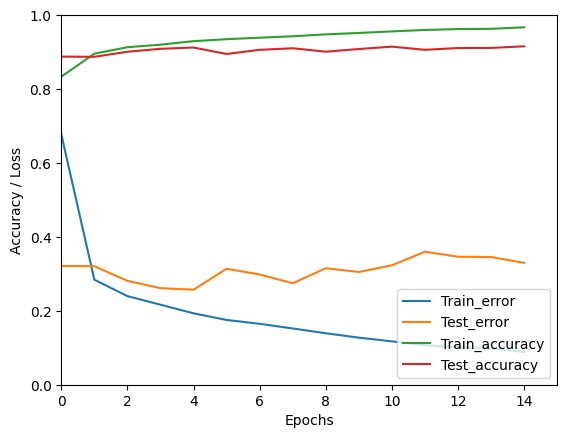

In [ ]:
plt.plot(history2_cnn.history['loss'], label='Train_error')
plt.plot(history2_cnn.history['val_loss'], label = 'Test_error')
plt.plot(history2_cnn.history['accuracy'], label = 'Train_accuracy')
plt.plot(history2_cnn.history['val_accuracy'], label = 'Test_accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.xlim([0, len(history2_cnn.history['accuracy'])])
plt.ylim([0, 1])
plt.legend(loc='lower right')

results2_cnn = model2_cnn.evaluate(X2_test,  y2_test, verbose=2)

Train_error = history2_cnn.history['loss']
Train_error = min(Train_error)

Train_Accuracy = history2_cnn.history['accuracy']
Train_Accuracy = max(Train_Accuracy)

Test_error = history2_cnn.history['val_loss']
Test_error = min(Test_error)

Test_Accuracy = history2_cnn.history['val_accuracy']
Test_Accuracy = max(Test_Accuracy)


print('Train_error', round(Train_error, 7), '\t', 'Train Accuracy:',  round(Train_Accuracy, 7))

# print('Test_error', round(Test_error, 7), '\t', 'Test Accuracy:',  round(Test_Accuracy, 7))

print('Test Error:', round(results2_cnn[0], 7), '\t', 'Test Accuracy:',  round(results2_cnn[1], 7))

# 2.3 Observation

# FCNN
- Train_error 0.2503307 	 Train Accuracy: 0.9311333
- Test Error: 0.5007455 	 Test Accuracy: 0.8679

# CNN
- Train_error 0.0142533 	 Train Accuracy: 0.9953
- Test Error: 0.5384493 	 Test Accuracy: 0.9144


Even if I ran 15 epochs, the CNN performance is better than FCNN. However, in the CNN process, I have to consider that it occurred overfitting. I thought that because, at first, I ran the CNN model over 100 epochs, but I watched that after about 13~15 epochs, the val_loss gradually increased, so I applied the Earlystopping.

Despite considering overfitting, If I had to choose one of the above two models, I would choose the CNN model because it showed better performance in test accuracy.

##**Problem 3**
In this problem, we will focus on completing a relatively more difficult image identification task for CIFAR-10 dataset. In this problem, you are asked to design a FCNN and a CNN, respectively, for this task. You will have the full freedom to design the structure of your FCNN and CNN.

Requirments:
*   You need to include the following four components in your lab report: (1) the codes for FCNN and CNN, (2) the obtained training errors by using FCNN and CNN, respectively, (3) the obtained testing error by using FCNN and CNN, and (4) your observation by comparing the performances of FCNN-based and CNN-based solutions for this task.
(Comment: Since the data is relatively complex, it is fine that you cannot get a very high accuracy.)

In [5]:
# Hint: Download CIFAR-10 dataset
(X3_train, y3_train), (X3_test, y3_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [6]:
FCNN_X3_train = X3_train.reshape(50000, 3072)
FCNN_X3_train = FCNN_X3_train.astype('float32') / 255

FCNN_X3_test = X3_test.reshape(10000, 3072)
FCNN_X3_test = FCNN_X3_test.astype('float32') / 255

print(X3_train.shape)
print(FCNN_X3_train.shape)

print(X3_test.shape)
print(FCNN_X3_test.shape)

(50000, 32, 32, 3)
(50000, 3072)
(10000, 32, 32, 3)
(10000, 3072)


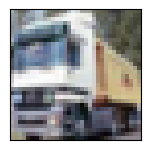

In [7]:
plt.figure(figsize=(20,20))
plt.subplot(10, 10, 1)
plt.xticks([])
plt.yticks([])
plt.imshow(X3_train[1], cmap=plt.cm.binary)
plt.show()

# 3.1 FCNN

In [8]:
# Design a fully-connected neural network with one input layer with two nodes, one hidden layer with two nodes, and one output layer with one node (totally three layers)
model3_fcnn = models.Sequential()
model3_fcnn.add(layers.Normalization(input_shape = [3072,], axis = None))
model3_fcnn.add(layers.Dense(300, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model3_fcnn.add(layers.Dense(200, activation = 'relu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model3_fcnn.add(layers.Dense(150, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)))
model3_fcnn.add(layers.Dense(100, activation='relu', activity_regularizer=tf.keras.regularizers.L2(0.01)))

model3_fcnn.add(layers.Dense(10, activation = 'softmax', activity_regularizer=tf.keras.regularizers.L2(0.01)))

model3_fcnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 3072)              3         
 on)                                                             
                                                                 
 dense (Dense)               (None, 300)               921900    
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 150)               30150     
                                                                 
 dense_3 (Dense)             (None, 100)               15100     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                        

In [19]:
with tf.device(device_name):
  batch_size = 100

  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, mode='auto')


  tf.config.get_visible_devices()
  adam = optimizers.Adam(learning_rate=0.0001)
  model3_fcnn.compile(optimizer = adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  history3_fcnn = model3_fcnn.fit(FCNN_X3_train, y3_train, epochs = 300, batch_size = batch_size,
                    validation_data=(FCNN_X3_test, y3_test), callbacks = [callback]) # , callbacks = [callback]

Epoch 1/300
500/500 [==============================] - 6s 5ms/step - loss: 2.1803 - accuracy: 0.1916 - val_loss: 2.0485 - val_accuracy: 0.2624
Epoch 2/300
500/500 [==============================] - 2s 4ms/step - loss: 1.9970 - accuracy: 0.2843 - val_loss: 1.9602 - val_accuracy: 0.3057
Epoch 3/300
500/500 [==============================] - 2s 5ms/step - loss: 1.9160 - accuracy: 0.3280 - val_loss: 1.8989 - val_accuracy: 0.3297
Epoch 4/300
500/500 [==============================] - 3s 6ms/step - loss: 1.8576 - accuracy: 0.3495 - val_loss: 1.8410 - val_accuracy: 0.3625
Epoch 5/300
500/500 [==============================] - 2s 5ms/step - loss: 1.8141 - accuracy: 0.3691 - val_loss: 1.8035 - val_accuracy: 0.3748
Epoch 6/300
500/500 [==============================] - 2s 5ms/step - loss: 1.7661 - accuracy: 0.3902 - val_loss: 1.7651 - val_accuracy: 0.3897
Epoch 7/300
500/500 [==============================] - 2s 4ms/step - loss: 1.7346 - accuracy: 0.3987 - val_loss: 1.7640 - val_accuracy: 0.3928

# Applying Earlystopping

In [9]:
with tf.device(device_name):
  batch_size = 100

  callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, mode='auto')


  tf.config.get_visible_devices()
  adam = optimizers.Adam(learning_rate=0.0001)
  model3_fcnn.compile(optimizer = adam,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  history3_fcnn = model3_fcnn.fit(FCNN_X3_train, y3_train, epochs = 300, batch_size = batch_size,
                    validation_data=(FCNN_X3_test, y3_test), callbacks = [callback]) # , callbacks = [callback]

Epoch 1/300
500/500 [==============================] - 11s 5ms/step - loss: 2.1735 - accuracy: 0.2124 - val_loss: 2.0457 - val_accuracy: 0.2694
Epoch 2/300
500/500 [==============================] - 2s 4ms/step - loss: 1.9682 - accuracy: 0.3084 - val_loss: 1.9255 - val_accuracy: 0.3356
Epoch 3/300
500/500 [==============================] - 3s 5ms/step - loss: 1.8933 - accuracy: 0.3356 - val_loss: 1.8640 - val_accuracy: 0.3518
Epoch 4/300
500/500 [==============================] - 2s 5ms/step - loss: 1.8430 - accuracy: 0.3577 - val_loss: 1.8404 - val_accuracy: 0.3657
Epoch 5/300
500/500 [==============================] - 2s 4ms/step - loss: 1.8022 - accuracy: 0.3749 - val_loss: 1.7828 - val_accuracy: 0.3847
Epoch 6/300
500/500 [==============================] - 2s 4ms/step - loss: 1.7629 - accuracy: 0.3909 - val_loss: 1.7576 - val_accuracy: 0.3953
Epoch 7/300
500/500 [==============================] - 2s 4ms/step - loss: 1.7320 - accuracy: 0.4011 - val_loss: 1.7596 - val_accuracy: 0.389

313/313 - 1s - loss: 1.5686 - accuracy: 0.4879 - 914ms/epoch - 3ms/step
Train_error 1.1684387 	 Train Accuracy: 0.61368
Test Error: 1.5686351 	 Test Accuracy: 0.4879


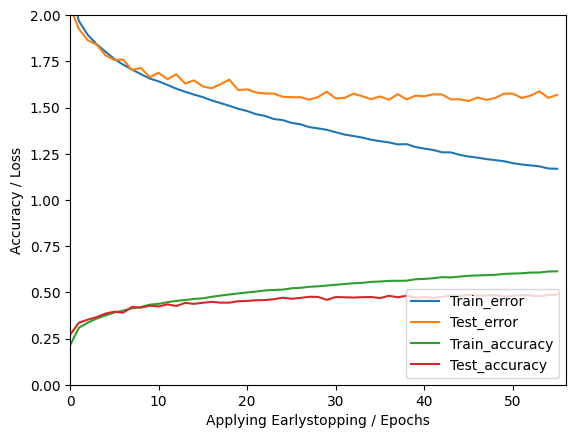

In [10]:
# Evaluate the fully connected neural network Model
plt.plot(history3_fcnn.history['loss'], label='Train_error')
plt.plot(history3_fcnn.history['val_loss'], label = 'Test_error')
plt.plot(history3_fcnn.history['accuracy'], label = 'Train_accuracy')
plt.plot(history3_fcnn.history['val_accuracy'], label = 'Test_accuracy')

plt.xlabel('Applying Earlystopping / Epochs')
plt.ylabel('Accuracy / Loss')
plt.xlim([0, len(history3_fcnn.history['loss'])])
plt.ylim([0, 2])
plt.legend(loc='lower right')

results3_fcnn = model3_fcnn.evaluate(FCNN_X3_test, y3_test, verbose=2)

Train_error = history3_fcnn.history['loss']
Train_error = min(Train_error)

Train_Accuracy = history3_fcnn.history['accuracy']
Train_Accuracy = max(Train_Accuracy)

print('Train_error', round(Train_error, 7), '\t', 'Train Accuracy:',  round(Train_Accuracy, 7))
print('Test Error:', round(results3_fcnn[0], 7), '\t', 'Test Accuracy:',  round(results3_fcnn[1], 7))

313/313 - 1s - loss: 2.9041 - accuracy: 0.4491 - 1s/epoch - 3ms/step
Train_error 0.4354971 	 Train Accuracy: 0.8857
Test Error: 2.9040892 	 Test Accuracy: 0.4491


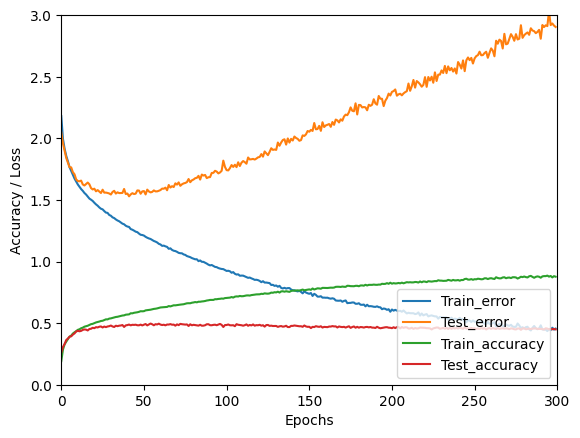

In [20]:
# Evaluate the fully connected neural network Model
plt.plot(history3_fcnn.history['loss'], label='Train_error')
plt.plot(history3_fcnn.history['val_loss'], label = 'Test_error')
plt.plot(history3_fcnn.history['accuracy'], label = 'Train_accuracy')
plt.plot(history3_fcnn.history['val_accuracy'], label = 'Test_accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.xlim([0, len(history3_fcnn.history['loss'])])
plt.ylim([0, 3])
plt.legend(loc='lower right')

results3_fcnn = model3_fcnn.evaluate(FCNN_X3_test, y3_test, verbose=2)

Train_error = history3_fcnn.history['loss']
Train_error = min(Train_error)

Train_Accuracy = history3_fcnn.history['accuracy']
Train_Accuracy = max(Train_Accuracy)

print('Train_error', round(Train_error, 7), '\t', 'Train Accuracy:',  round(Train_Accuracy, 7))
print('Test Error:', round(results3_fcnn[0], 7), '\t', 'Test Accuracy:',  round(results3_fcnn[1], 7))

# 3.2 CNN

In [15]:
# Buidling CNN
model3_cnn = models.Sequential()

# Extracting features
model3_cnn.add(layers.Conv2D(50, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model3_cnn.add(layers.Conv2D(50, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model3_cnn.add(layers.MaxPooling2D((2, 2)))

model3_cnn.add(layers.Conv2D(100, (3, 3), activation='relu', padding='same'))
model3_cnn.add(layers.Conv2D(100, (3, 3), activation='relu', padding='same'))
model3_cnn.add(layers.MaxPooling2D((2, 2)))

model3_cnn.add(layers.Conv2D(200, (3, 3), activation='relu', padding='same'))
model3_cnn.add(layers.Conv2D(200, (3, 3), activation='relu', padding='same'))
model3_cnn.add(layers.MaxPooling2D((2, 2)))

# Categorize
model3_cnn.add(layers.Flatten())
model3_cnn.add(layers.Dense(130, activation='relu'))

# output
model3_cnn.add(layers.Dense(10, activation = 'softmax'))

model3_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 50)        1400      
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 50)        22550     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 50)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 100)       45100     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 100)       90100     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 100)         0         
 g2D)                                                 

In [16]:

# from_logits = False if you set the activation function as softmax in the last dense layer

batch_size = 100
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 10, mode='auto')

with tf.device(device_name):
  adam = optimizers.Adam(learning_rate=0.0001)


  model3_cnn.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # softamx: from_logits=True / other activation => False
            metrics=['accuracy'])

  history3_cnn = model3_cnn.fit(X3_train, y3_train, epochs = 33, batch_size = batch_size,
                    validation_data=(X3_test, y3_test)) # , callbacks = [callback]

Epoch 1/33


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


500/500 [==============================] - 13s 18ms/step - loss: 1.6520 - accuracy: 0.4420 - val_loss: 1.1368 - val_accuracy: 0.5971
Epoch 2/33
500/500 [==============================] - 9s 18ms/step - loss: 1.0170 - accuracy: 0.6436 - val_loss: 0.9689 - val_accuracy: 0.6642
Epoch 3/33
500/500 [==============================] - 9s 18ms/step - loss: 0.7908 - accuracy: 0.7249 - val_loss: 0.8522 - val_accuracy: 0.7069
Epoch 4/33
500/500 [==============================] - 9s 18ms/step - loss: 0.6610 - accuracy: 0.7687 - val_loss: 0.7983 - val_accuracy: 0.7243
Epoch 5/33
500/500 [==============================] - 9s 18ms/step - loss: 0.5673 - accuracy: 0.8034 - val_loss: 0.7631 - val_accuracy: 0.7419
Epoch 6/33
500/500 [==============================] - 9s 18ms/step - loss: 0.4890 - accuracy: 0.8286 - val_loss: 0.7768 - val_accuracy: 0.7514
Epoch 7/33
500/500 [==============================] - 9s 18ms/step - loss: 0.4194 - accuracy: 0.8527 - val_loss: 0.8579 - val_accuracy: 0.7378
Epoch 8/3

313/313 - 1s - loss: 1.5007 - accuracy: 0.7567 - 1s/epoch - 5ms/step
Train_error 0.1135254 	 Train Accuracy: 0.96476
Test Error: 1.5007184 	 Test Accuracy: 0.7567


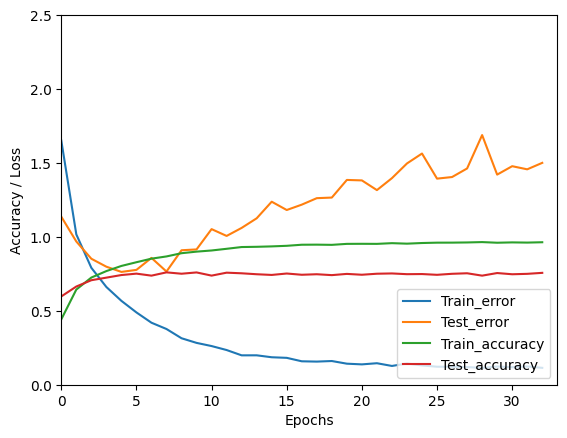

In [17]:
plt.plot(history3_cnn.history['loss'], label='Train_error')
plt.plot(history3_cnn.history['val_loss'], label = 'Test_error')
plt.plot(history3_cnn.history['accuracy'], label = 'Train_accuracy')
plt.plot(history3_cnn.history['val_accuracy'], label = 'Test_accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.xlim([0, len(history3_cnn.history['accuracy'])])
plt.ylim([0, 2.5])
plt.legend(loc='lower right')

results3_cnn = model3_cnn.evaluate(X3_test,  y3_test, verbose=2)

Train_error = history3_cnn.history['loss']
Train_error = min(Train_error)

Train_Accuracy = history3_cnn.history['accuracy']
Train_Accuracy = max(Train_Accuracy)

Test_error = history3_cnn.history['val_loss']
Test_error = min(Test_error)

Test_Accuracy = history3_cnn.history['val_accuracy']
Test_Accuracy = max(Test_Accuracy)


print('Train_error', round(Train_error, 7), '\t', 'Train Accuracy:',  round(Train_Accuracy, 7))

# print('Test_error', round(Test_error, 7), '\t', 'Test Accuracy:',  round(Test_Accuracy, 7))

print('Test Error:', round(results3_cnn[0], 7), '\t', 'Test Accuracy:',  round(results3_cnn[1], 7))

# 3.4 Observation

# FCNN
- Train_error 0.4354971 	 Train Accuracy: 0.8857
- Test Error: 2.9040892 	 Test Accuracy: 0.4491

# CNN
- Train_error 0.1135254 	 Train Accuracy: 0.96476
- Test Error: 1.5007184 	 Test Accuracy: 0.7567


The overall results are very similar to problem 2. Of course, in FCNN process, the results can be changed by the number of hidden layers, the number of nodes of each hidden layer, or the learning rate. Similarly, in the CNN process, the result can be changed by the number of CNN blocks, each CNN layer's dimension, and the Flatten layer's dimension.

However, I think CNN shows better performance than FCNN.